<a href="https://colab.research.google.com/github/Anshugit109/CODSOFT/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 3 IRIS FLOWER CLASSIFICATION**

In [1]:
##importing the required module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
## through module pandas reading the content of dataset
data=pd.read_csv("/content/IRIS.csv",encoding='ISO-8859-1')

In [3]:
data.shape ## this will show the shape of dataset

(150, 5)

In [4]:
# This will show the data
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
### for getting the type of data eg-int,float,object etc...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe() ### this shows the various parameters of dataset such as mean,standard deviation etc..

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isnull().sum() ##this will sum up the null values if any section having a NAN value or null value

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
## importing libraries used for encoding
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
lb=LabelEncoder()

In [11]:
for i in data.columns:
  if is_numeric_dtype(data[i]):
    continue
  else:
    data[i]=lb.fit_transform(data[i])

/tmp/ipython-input-12-1332669003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species',data=data,palette='Set2',edgecolor='black')


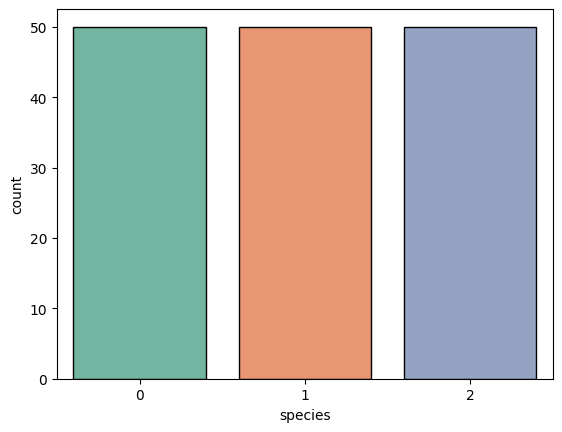

In [12]:
## Created a bar chart to see the counts of species category
sns.countplot(x='species',data=data,palette='Set2',edgecolor='black')
plt.show()


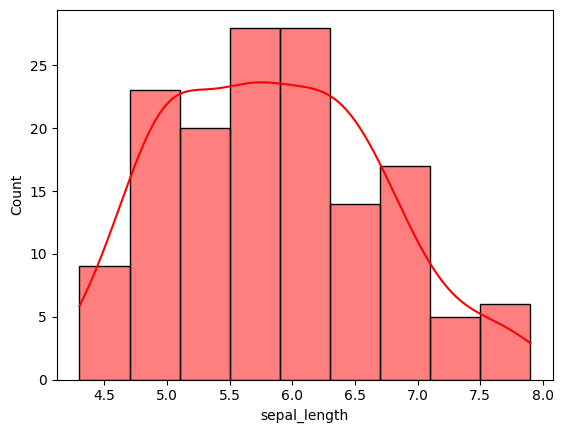

In [13]:
## building a histogram for sepal_length data to know the relation
sns.histplot(data['sepal_length'],kde=True,color='red')
plt.show()

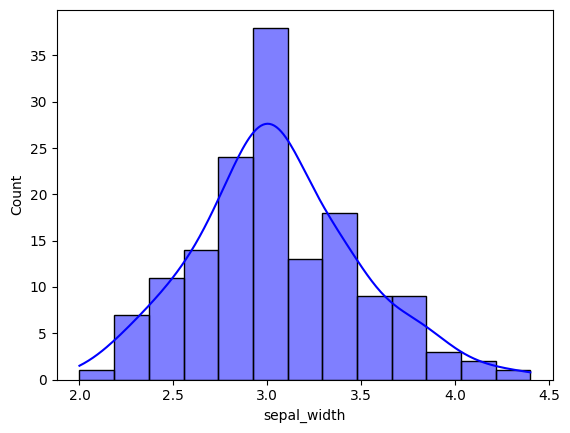

In [14]:
## same for sepal_width
sns.histplot(data['sepal_width'],kde=True,color='blue')
plt.show()

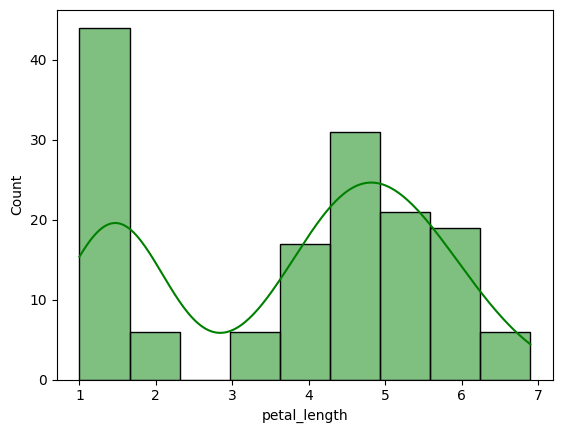

In [15]:
### for petal_length
sns.histplot(data['petal_length'],kde=True,color='green')
plt.show()

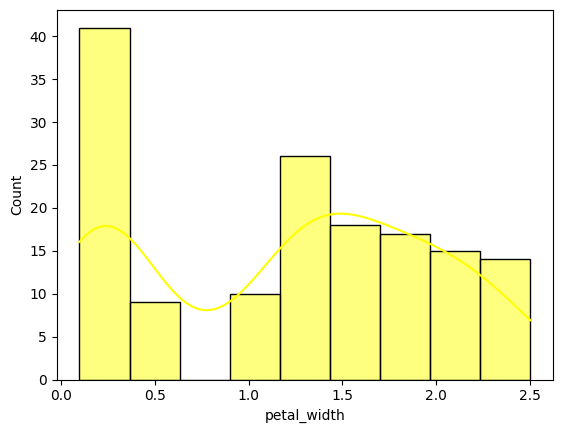

In [16]:
## for petal_width
sns.histplot(data['petal_width'],kde=True,color='yellow')
plt.show()

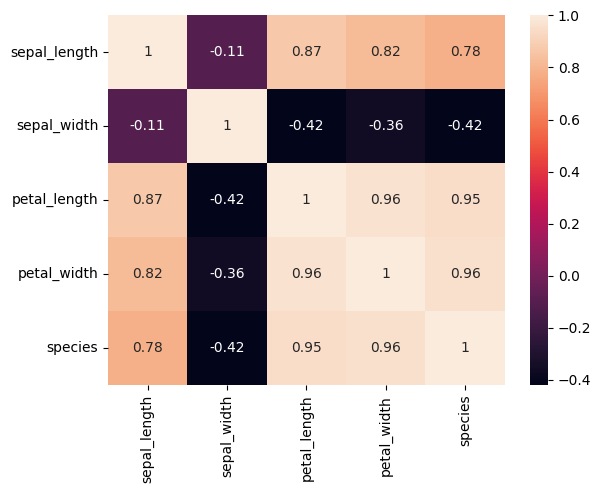

In [17]:
## creating a heatmap to see the feature wise correlation in the dataset
sns.heatmap(data.corr(),annot=True)
plt.show()


In [18]:
### building an ml model
from sklearn.model_selection import train_test_split

In [19]:
## assigning the predictor and target variable
x=data.drop(['species'],axis=1)
y=data.species

In [20]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
## importing essential model for model building
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
## Evaluating the model to verify the accuracy
print("Training Accuracy:",model.score(X_train,y_train)*100)
print("Accuracy:",model.score(X_test,y_test)*100)

Training Accuracy: 97.5
Accuracy: 100.0


In [23]:
## importing essential libraries for random forest classifier
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=300,random_state=100)
model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=100)

In [24]:
## evaluating the model to verify accuracy
print("Training Accuracy:",model2.score(X_train,y_train)*100)
print("Accuracy:",model2.score(X_test,y_test)*100)

Training Accuracy: 100.0
Accuracy: 100.0


In [25]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
## evaluating the model to verify accuracy
print("Training Accuracy:",model3.score(X_train,y_train)*100)
print("Accuracy:",model3.score(X_test,y_test)*100)

Training Accuracy: 96.66666666666667
Accuracy: 100.0


In [27]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
### Model testing
## for testing created a new datframe with values closer to the any of our existing data to evaluate.
new_data={'sepal_length':[5.2],'sepal_width':[3.6],'petal_length':[1.4],'petal_width':[0.2]}
test=pd.DataFrame(new_data)

In [29]:
result=model.predict(test)
print(result) ## display the result from the model

[0]
